---

# Topic Modeling (Prepare)

On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophisticated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifying common themes in customer reviews
* Discovering the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* Part 0: Warm-Up
* Part 1: Describe how an LDA Model works
* Part 2: Estimate a LDA Model with Gensim
* Part 3: Interpret LDA results & Select the appropriate number of topics

# Part 0: Warm-Up
How do we do a grid search? 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Dataset
# categories = ['sci.electronics',
#               'rec.sport.baseball',
#               'rec.sport.hockey']

# Load training data
newsgroups_train = fetch_20newsgroups(subset='train', 
                                      remove=('headers', 'footers', 'quotes'))

# Load testing data
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'))

print(f'Training Samples: {len(newsgroups_train.data)}')
print(f'Testing Samples: {len(newsgroups_test.data)}')

Training Samples: 11314
Testing Samples: 7532


In [4]:
newsgroups_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
newsgroups_train['data'][0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

### GridSearch on Just Classifier
* Fit the vectorizer and prepare BEFORE it goes into the gridsearch

In [6]:
# create tfidf instant

# transform data

# create parameter dict

# create model instance 

# instantiate a grid search object

# optimize model parameters
vect1 = TfidfVectorizer()
X_train = vect1.fit_transform(newsgroups_train['data'])
print(X_train.shape)

(11314, 101631)


In [7]:
dir(newsgroups_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [8]:
y = newsgroups_train['target']
y.shape

(11314,)

In [9]:
p1 = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10]
}

clf = RandomForestClassifier()
gs1 = GridSearchCV(clf, p1, cv=5, n_jobs=-1, verbose=1)
gs1.fit(X_train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [10]:
gs1.best_params_

{'max_depth': None, 'n_estimators': 50}

In [11]:
gs1.best_score_

0.6073001145166564

In [12]:
# create and tranform a sample text 
sample_vec = vect1.transform(['The yankees are the best team in baseball'])
print(sample_vec.shape)

# use the model to classify the sample text 
gs1.predict(sample_vec)

(1, 101631)


array([9])

In [13]:
newsgroups_train['target_names'][9]

'rec.sport.baseball'

### GridSearch with BOTH the Vectoizer & Classifier

In [14]:
from sklearn.pipeline import Pipeline

# create tfidf instance

# create model instance 

# Create a pipline instance using tfidf and your model 

# create parameter dict

# instantiate a grid search object

# optimize model parameters

pipeline = Pipeline([
    ('vect', vect1),
    ('clf', clf)
])

p2 = {
    'vect__stop_words': (None, 'english'),
    'vect__min_df': (2, 5),
    'clf__max_depth': (20, None)
}

gs2 = GridSearchCV(pipeline, p2, cv=5, n_jobs=-1, verbose=1)
gs2.fit(newsgroups_train['data'], newsgroups_train['target'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [15]:
gs2.best_params_

{'clf__max_depth': None, 'vect__min_df': 2, 'vect__stop_words': 'english'}

In [16]:
gs2.best_score_

0.6597133449998887

In [17]:
# pass a raw text sample into the optimized model in order to classify it
gs2.predict(['The yankees are the best team in baseball'])

array([9])

Advantages to using GS with the Pipe:
* Allows us to make predictions on raw text increasing reproducibility. :)
* Allows us to tune the parameters of the vectorizer along side the classifier. :D 

# Part 1: Describe how an LDA Model works

[Your Guide to Latent Dirichlet Allocation](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

[LDA Topic Modeling](https://lettier.com/projects/lda-topic-modeling/)

[Topic Modeling with Gensim](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [18]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.DataFrame({
    'content': newsgroups_train['data'],
    'target': newsgroups_train['target'],
    'target_names': [newsgroups_train['target_names'][i] for i in newsgroups_train['target']]
})
print(df.shape)
df.head()

(11314, 3)


/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names
0,I was wondering if anyone out there could enli...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space


In [20]:
pd.set_option('display.max_colwidth', 300)

df.sample(5)

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names
10720,Two-volume soft-cover repair manuals\nfor all models of '91 Toyota Celicas.\n(Probably good for '92 models as well.)\nLike new condition.\nThese are the manuals used by the\nToyota dealers' mechanics - they normally\ncost over $80 new.\n\n$50 OBO,7,rec.autos
1701,"I've been running Dos 6 for about a month. I was generally impressed with\nthe improvements: the multiple boot configurations were great, the\nnew commands were nice, and DoubleSpace worked fine (twice as slow for\nlarge data transfers, twice as fast for small with SmartDrv).\n\nUntil now.\n\n...",2,comp.os.ms-windows.misc
4211,"\n\nIt's normal for the BMW K bikes to use a little oil in the first few thousand \nmiles. I don't know why. I've had three new K bikes, and all three used a\nbit of oil when new - max maybe .4 quart in first 1000 miles; this soon quits\nand by the time I had 10,000 miles on them the oil consu...",8,rec.motorcycles
6114,"I am looking at buying a low cost (< $500) scope for general purpose use.\nAny recommendations? Is this info in a faq somewhere?\nAny pointers appreciated.\nThanks,\n -Gerard.",12,sci.electronics
10174,"I just read articals on this in Road and Track and Car and Driver\n\t(Is that one mag or two? =B^), and I was wondering if people out\n\tthere have any opinions that differed from what these mags have to\n\tsay...\n\n\n\tI'm looking at the following three SUV's; anyone who's driven all\n\tthree ...",7,rec.autos


In [21]:
# can visit (https://regex101.com/) for a regex python editor (has cheat sheets)

# 1. Remove new line characters
df['clean_text'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))

# 2. Remove Emails
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('From: \S+@\S+', '', x))

# 3. Remove non-alphanumeric characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# 4. Remove extra whitespace and lowercase text
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x.lower().split()))

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
<ipython-input-21-0c70f6a85105>:4: DeprecationWarning: invalid escape sequence \s
  df['clean_text'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))
<ipython-input-21-0c70f6a85105>:7: DeprecationWarning: invalid escape sequence \S
  df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('From: \S+

In [22]:
df.head()

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names,clean_text
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \...",7,rec.autos,i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyo...
1,"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy...",4,comp.sys.mac.hardware,a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk func...
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\ni'm looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopef...",4,comp.sys.mac.hardware,well folks my mac plus finally gave up the ghost this weekend after starting life as a k way back in sooo i m in the market for a new machine a bit sooner than i intended to be i m looking into picking up a powerbook or maybe and have a bunch of questions that hopefully somebody can answer does ...
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n,1,comp.graphics,do you have weitek s address phone number i d like to get some information about this chip
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - things are checked\nthat don't have the right values in yet because they aren't\nset till after launch,...",14,sci.space,from article c owcb n p world std com by tombaker world std com tom a baker my understanding is that the expected errors are basically known bugs in the warning system software things are checked that don t have the right values in yet because they aren t set till after launch and suchlike rathe...


In [23]:
# Leverage tqdm for progress_apply
from tqdm import tqdm
tqdm.pandas()

# If you're on macOS, Linux, or python session executed from Windows Subsystem for Linux (WSL)
# conda activate U4-S1-NLP
# pip install pandarallel
#
# from pandarallel import pandarallel
# pandarallel.initialize(progress_bar=True)
#
# df['lemmas'] = df['content'].parallel_apply(get_lemmas)
#
# Ref: https://github.com/nalepae/pandarallel

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
nlp = spacy.load("en_core_web_md", disable=['parser', 'tagger', 'ner'])

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# create our tokens in the form of lemmas 
df['lemmas'] = df['clean_text'].progress_apply(lambda x: [token.lemma_ for token in nlp(x) if (token.is_stop != True) and (token.is_punct != True) and (len(token) > 2)])

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 11314/11314 [00:05<00:00, 2086.00it/s]


In [26]:
df.head()

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names,clean_text,lemmas
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \...",7,rec.autos,i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyo...,"[wonder, enlighten, car, see, day, door, sport, car, look, late, early, call, bricklin, door, small, addition, bumper, separate, rest, body, know, tellme, model, engine, spec, year, production, car, history, info, funky, look, car, mail]"
1,"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy...",4,comp.sys.mac.hardware,a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk func...,"[fair, numb, brave, soul, upgrade, clock, oscillator, share, experience, poll, send, brief, message, detail, experience, procedure, speed, attain, cpu, rate, speed, add, card, adapter, heat, sink, hour, usage, day, floppy, disk, functionality, floppy, especially, request, summarize, day, add, ne..."
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\ni'm looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopef...",4,comp.sys.mac.hardware,well folks my mac plus finally gave up the ghost this weekend after starting life as a k way back in sooo i m in the market for a new machine a bit sooner than i intended to be i m looking into picking up a powerbook or maybe and have a bunch of questions that hopefully somebody can answer does ...,"[folk, mac, plus, finally, give, ghost, weekend, start, life, way, sooo, market, new, machine, bite, soon, intend, look, pick, powerbook, maybe, bunch, question, hopefully, somebody, answer, anybody, know, dirt, round, powerbook, introduction, expect, hear, suppose, appearence, summer, haven, he..."
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n,1,comp.graphics,do you have weitek s address phone number i d like to get some information about this chip,"[weitek, address, phone, numb, like, information, chip]"
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - things are checked\nthat don't have the right values in yet because they aren't\nset till after launch,...",14,sci.space,from article c owcb n p world std com by tombaker world std com tom a baker my understanding is that the expected errors are basically known bugs in the warning system software things are checked that don t have the right values in yet because they aren t set till after launch and suchlike rathe...,"[article, owcb, world, std, com, tombaker, world, std, com, tom, baker, understand, expect, error, basically, know, bug, warn, system, software, thing, check, don, right, value, aren, set, till, launch, suchlike, fix, code, possibly, introduce, new, bug, tell, crow, warn, liftoff, ignore]"


### The two main inputs to the LDA topic model are the dictionary (id2word) and the corpus.

In [27]:
# Create Dictionary

# Term Document Frequency

# stores (token id, token count) for each doc in the corpus

# Human readable format of corpus (term-frequency)

id2word = corpora.Dictionary(df['lemmas'])
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# How many words are in our vocab?
len(id2word.keys())

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


61160

In [29]:
# Let's remove extreme values
id2word.filter_extremes(no_below=3, no_above=0.2)

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# How many words are in our vocab?
len(id2word.keys())

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


18027

In [31]:
# Re-create DTM with new dictionary of vocab
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
id2word[200]

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'destruction'

In [33]:
df.lemmas.iloc[5]

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['course',
 'term',
 'rigidly',
 'define',
 'bill',
 'doubt',
 'use',
 'term',
 'quote',
 'allegedly',
 'read',
 'article',
 'present',
 'argument',
 'weapon',
 'mass',
 'destruction',
 'commonly',
 'understand',
 'switch',
 'topic',
 'point',
 'evidently',
 'weapon',
 'allow',
 'late',
 'analysis',
 'give',
 'understand',
 'consider',
 'class']

In [34]:
corpus[5]

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(13, 1),
 (92, 1),
 (127, 1),
 (148, 1),
 (162, 1),
 (186, 2),
 (190, 1),
 (191, 1),
 (192, 1),
 (193, 1),
 (194, 1),
 (195, 1),
 (196, 1),
 (197, 1),
 (198, 1),
 (199, 1),
 (200, 1),
 (201, 1),
 (202, 1),
 (203, 1),
 (204, 1),
 (205, 1),
 (206, 1),
 (207, 1),
 (208, 2),
 (209, 1),
 (210, 2)]

In [35]:
[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('late', 1),
 ('give', 1),
 ('read', 1),
 ('use', 1),
 ('article', 1),
 ('understand', 2),
 ('allegedly', 1),
 ('allow', 1),
 ('analysis', 1),
 ('argument', 1),
 ('bill', 1),
 ('class', 1),
 ('commonly', 1),
 ('consider', 1),
 ('course', 1),
 ('define', 1),
 ('destruction', 1),
 ('doubt', 1),
 ('evidently', 1),
 ('mass', 1),
 ('point', 1),
 ('present', 1),
 ('quote', 1),
 ('switch', 1),
 ('term', 2),
 ('topic', 1),
 ('weapon', 2)]

# Part 2: Estimate a LDA Model with Gensim

 ### Train an LDA model

In [36]:
### This cell runs the single-processor version of the model (slower)
# %%time
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            chunksize=100,
#                                            passes=10,
#                                            per_word_topics=True)
# lda_model.save('lda_model.model')
# # https://radimrehurek.com/gensim/models/ldamodel.html

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
%%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=20, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=12)


lda_multicore.save('lda_multicore.model')
# https://radimrehurek.com/gensim/models/ldamulticore.html

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 20.9 s, sys: 7.25 s, total: 28.1 s
Wall time: 27 s


In [38]:
from gensim import models
lda_multicore =  models.LdaModel.load('lda_multicore.model')

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### View the topics in LDA model

In [39]:
df.target_names.value_counts()

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
sci.space                   593
comp.windows.x              593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: target_names, dtype: int64

In [40]:
# display the print_topics from the model 
pprint(lda_multicore.print_topics())

[(0,
  '0.017*"window" + 0.013*"card" + 0.012*"use" + 0.012*"drive" + '
  '0.011*"system" + 0.011*"problem" + 0.010*"disk" + 0.009*"work" + '
  '0.008*"bite" + 0.008*"run"'),
 (1,
  '0.027*"space" + 0.010*"launch" + 0.010*"nasa" + 0.007*"earth" + '
  '0.007*"satellite" + 0.007*"year" + 0.007*"mission" + 0.007*"orbit" + '
  '0.006*"shuttle" + 0.006*"time"'),
 (2,
  '0.016*"good" + 0.012*"get" + 0.009*"fire" + 0.009*"people" + 0.009*"hear" + '
  '0.009*"start" + 0.008*"right" + 0.008*"thing" + 0.007*"post" + '
  '0.007*"sure"'),
 (3,
  '0.053*"drive" + 0.022*"master" + 0.019*"slave" + 0.019*"jumper" + '
  '0.011*"head" + 0.010*"engine" + 0.010*"close" + 0.010*"single" + '
  '0.009*"open" + 0.009*"car"'),
 (4,
  '0.015*"israel" + 0.012*"armenian" + 0.012*"war" + 0.011*"jews" + '
  '0.010*"armenians" + 0.009*"israeli" + 0.008*"kill" + 0.008*"people" + '
  '0.008*"attack" + 0.008*"turkish"'),
 (5,
  '0.027*"car" + 0.019*"price" + 0.017*"sell" + 0.015*"new" + 0.014*"buy" + '
  '0.014*"sale" 

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
df.lemmas.iloc[1]

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['fair',
 'numb',
 'brave',
 'soul',
 'upgrade',
 'clock',
 'oscillator',
 'share',
 'experience',
 'poll',
 'send',
 'brief',
 'message',
 'detail',
 'experience',
 'procedure',
 'speed',
 'attain',
 'cpu',
 'rate',
 'speed',
 'add',
 'card',
 'adapter',
 'heat',
 'sink',
 'hour',
 'usage',
 'day',
 'floppy',
 'disk',
 'functionality',
 'floppy',
 'especially',
 'request',
 'summarize',
 'day',
 'add',
 'network',
 'knowledge',
 'base',
 'clock',
 'upgrade',
 'haven',
 'answer',
 'poll',
 'thank']

In [42]:
doc_lda = lda_multicore[corpus]
doc_lda[1][0]

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.59957355), (15, 0.060876947), (17, 0.18803664), (19, 0.13483146)]

# Part 3: Interpret LDA results & Select the appropriate number of topics

In [43]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_multicore, corpus, id2word)
vis

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18     0.108162  0.090740       1        1  13.448353
11     0.096425 -0.019293       2        1   9.354547
0      0.084192 -0.145655       3        1   9.230107
19     0.035889 -0.246805       4        1   9.161510
16     0.095543  0.161540       5        1   8.027723
7      0.068501  0.096454       6        1   6.257827
13     0.005474  0.097306       7        1   6.096590
1      0.048538 -0.018795       8        1   4.628172
17     0.072032 -0.036539       9        1   4.504948
4      0.035193  0.166899      10        1   4.450911
2      0.089612  0.127064      11        1   3.831065
15    -0.027661 -0.215853      12        1   3.406452
5      0.034028 -0.001933      13        1   3.225550
12     0.037742  0.019095      14        1   3.174391
8      0.043588  0.032207      15        1   2.958739
14    -0.043621 -0.196316      16        1   2.353734
10     0.020525  0.052018      17        1   1.964548
3     -0.011283 -0.070110      18        1   1.533195
6     -0.440510  0.040024      19        1   1.302490
9     -0.352371  0.067952      20        1   1.089149, topic_info=          Term         Freq        Total Category  logprob  loglift
1612       max  4765.000000  4765.000000  Default  30.0000  30.0000
216       file  2569.000000  2569.000000  Default  29.0000  29.0000
239      drive  1951.000000  1951.000000  Default  28.0000  28.0000
80         edu  2415.000000  2415.000000  Default  27.0000  27.0000
1124       god  2230.000000  2230.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
3564   florida    48.137904   105.637091  Topic20  -5.3170   3.7338
1217       kid    47.864767   254.177723  Topic20  -5.3227   2.8501
752   coverage    37.708248   121.416615  Topic20  -5.5612   3.3504
4668  abortion    35.020594    74.235795  Topic20  -5.6352   3.7685
2792   predict    34.643090   121.849064  Topic20  -5.6460   3.2621

[1388 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
348       1  0.107707      2
348       2  0.064624      2
348       3  0.121709      2
348       4  0.019387      2
348       5  0.092628      2
...     ...       ...    ...
5516     10  0.045348  youth
4365      3  0.034897    zip
4365      4  0.005816    zip
4365     12  0.907311    zip
4365     18  0.040713    zip

[5751 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 12, 1, 20, 17, 8, 14, 2, 18, 5, 3, 16, 6, 13, 9, 15, 11, 4, 7, 10])

### What is topic coherence?
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”


In [44]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
%%time
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemmas'], start=2, limit=22, step=4)

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 1min 30s, sys: 16.4 s, total: 1min 46s
Wall time: 1min 51s


/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


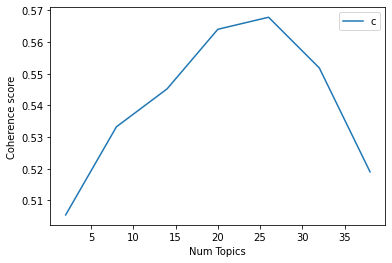

In [47]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [48]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5054
Num Topics = 8  has Coherence Value of 0.5332
Num Topics = 14  has Coherence Value of 0.5452
Num Topics = 20  has Coherence Value of 0.564
Num Topics = 26  has Coherence Value of 0.5678
Num Topics = 32  has Coherence Value of 0.5518
Num Topics = 38  has Coherence Value of 0.519


/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# Select the model and print the topics
#optimal_model = model_list[1]
#optimal_model =  models.LdaModel.load('optimal_model.model')
optimal_model =  models.LdaModel.load('lda_multicore.model')
model_topics = optimal_model.show_topics(formatted=False)
display(model_topics)
pprint(optimal_model.print_topics(num_words=10))

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(8,
  [('water', 0.008725212),
   ('good', 0.008228264),
   ('science', 0.0080729285),
   ('new', 0.006285446),
   ('model', 0.0053800535),
   ('theory', 0.0050195195),
   ('value', 0.005009221),
   ('thing', 0.0046681515),
   ('time', 0.004634564),
   ('objective', 0.004604534)]),
 (9,
  [('chz', 0.015940562),
   ('air', 0.014253943),
   ('rlk', 0.010490579),
   ('gcx', 0.009407964),
   ('uww', 0.009075651),
   ('rck', 0.008624412),
   ('abc', 0.0073605557),
   ('rmc', 0.0071725566),
   ('lhz', 0.006908317),
   ('alomar', 0.0065498427)]),
 (1,
  [('space', 0.027252194),
   ('launch', 0.009954343),
   ('nasa', 0.0095829815),
   ('earth', 0.0073371823),
   ('satellite', 0.0071452707),
   ('year', 0.0070529636),
   ('mission', 0.00690056),
   ('orbit', 0.006708478),
   ('shuttle', 0.0057920986),
   ('time', 0.005682043)]),
 (19,
  [('mail', 0.0115078185),
   ('available', 0.010081143),
   ('edu', 0.009963806),
   ('list', 0.009700134),
   ('include', 0.00887978),
   ('server', 0.0082776

[(0,
  '0.017*"window" + 0.013*"card" + 0.012*"use" + 0.012*"drive" + '
  '0.011*"system" + 0.011*"problem" + 0.010*"disk" + 0.009*"work" + '
  '0.008*"bite" + 0.008*"run"'),
 (1,
  '0.027*"space" + 0.010*"launch" + 0.010*"nasa" + 0.007*"earth" + '
  '0.007*"satellite" + 0.007*"year" + 0.007*"mission" + 0.007*"orbit" + '
  '0.006*"shuttle" + 0.006*"time"'),
 (2,
  '0.016*"good" + 0.012*"get" + 0.009*"fire" + 0.009*"people" + 0.009*"hear" + '
  '0.009*"start" + 0.008*"right" + 0.008*"thing" + 0.007*"post" + '
  '0.007*"sure"'),
 (3,
  '0.053*"drive" + 0.022*"master" + 0.019*"slave" + 0.019*"jumper" + '
  '0.011*"head" + 0.010*"engine" + 0.010*"close" + 0.010*"single" + '
  '0.009*"open" + 0.009*"car"'),
 (4,
  '0.015*"israel" + 0.012*"armenian" + 0.012*"war" + 0.011*"jews" + '
  '0.010*"armenians" + 0.009*"israeli" + 0.008*"kill" + 0.008*"people" + '
  '0.008*"attack" + 0.008*"turkish"'),
 (5,
  '0.027*"car" + 0.019*"price" + 0.017*"sell" + 0.015*"new" + 0.014*"buy" + '
  '0.014*"sale" 